<a href="https://colab.research.google.com/github/CodeHunterOfficial/ABC_DataMining/blob/main/NLP/Lesson%208.%20Classification/3_0_4_%D0%9F%D1%80%D0%B0%D0%BA%D1%82%D0%B8%D0%BA%D0%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1. Логистическая регрессия



Для решения задачи классификации и анализа тональности текста с использованием логистической регрессии была разработана последовательность шагов, включающая создание и предобработку текстовых данных, построение модели, подбор гиперпараметров, оценку качества модели и диагностику ее остаточных ошибок.

### 1. Создание датасета

В рамках эксперимента был сгенерирован небольшой датасет, содержащий текстовые данные с метками, отражающими тональность отзывов о продукте. Тексты классифицировались на положительные (1) и отрицательные (0) отзывы.

```python
import pandas as pd

# Создание датасета
data = {
    'text': [
        "I love this product!",
        "Worst purchase I have made.",
        "This is an amazing product!",
        "Very bad quality, do not buy.",
        "Totally worth the money!",
        "Terrible service, I will not return.",
        "Absolutely fantastic experience.",
        "I will never buy this again!",
        "The product is okay, nothing special.",
        "Great value for the price."
    ],
    'sentiment': [1, 0, 1, 0, 1, 0, 1, 0, 1, 1]  # 1 - положительный, 0 - отрицательный
}

df = pd.DataFrame(data)
print(df)
```

### 2. Предобработка текстовых данных

Для преобразования текстовых данных в числовой формат был использован метод векторизации с применением TF-IDF (Term Frequency-Inverse Document Frequency). Этот метод позволяет учитывать частотность слов в тексте и их значимость в контексте всего корпуса документов.

```python
from sklearn.feature_extraction.text import TfidfVectorizer

# Преобразование текста в числовую матрицу с использованием TF-IDF
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(df['text'])
y = df['sentiment']
```

### 3. Построение модели логистической регрессии

Модель логистической регрессии была построена и обучена на обучающей выборке. Для оценки качества модели использовались стандартные метрики, такие как точность, F1-меры и матрица ошибок.

```python
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Построение модели логистической регрессии
model = LogisticRegression(solver='liblinear')

# Обучение модели
model.fit(X_train, y_train)

# Прогнозирование на тестовых данных
y_pred = model.predict(X_test)

# Оценка качества модели
print("Accuracy: ", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
```

### 4. Поиск оптимальных гиперпараметров

Для улучшения качества модели был применен метод подбора гиперпараметров с использованием кросс-валидации через `GridSearchCV`. В частности, была оптимизирована величина коэффициента регуляризации `C`, который контролирует степень штрафа за сложность модели.

```python
from sklearn.model_selection import GridSearchCV

# Параметры для поиска оптимального гиперпараметра C
param_grid = {'C': [0.1, 1, 10, 100]}

# Применение GridSearchCV для подбора параметров
grid_search = GridSearchCV(LogisticRegression(solver='liblinear'), param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Лучшая модель и значение гиперпараметра
best_model = grid_search.best_estimator_
print("Лучший параметр C: ", grid_search.best_params_)

# Прогнозирование с лучшей моделью
y_pred_best = best_model.predict(X_test)

# Оценка качества улучшенной модели
print("Accuracy (after tuning): ", accuracy_score(y_test, y_pred_best))
print("Classification Report (after tuning):\n", classification_report(y_test, y_pred_best))
```

### 5. Оценка качества модели

Для оценки модели были использованы несколько метрик, включая точность (accuracy), F1-меру и кривую ROC. Это позволило комплексно оценить качество классификации, а также выявить возможные недостатки модели, такие как проблемы с дисбалансом классов.

```python
import matplotlib.pyplot as plt
import seaborn as sns

# Матрица ошибок
conf_matrix = confusion_matrix(y_test, y_pred_best)

# Визуализация матрицы ошибок
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Negative", "Positive"], yticklabels=["Negative", "Positive"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

# Кривая ROC
from sklearn.metrics import roc_curve, auc

fpr, tpr, _ = roc_curve(y_test, best_model.predict_proba(X_test)[:,1])
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()
```

### 6. Диагностика остатков модели

Для диагностики модели были построены остатки и исследована их распределенность. Остатки модели позволяют оценить, насколько хорошо модель описывает данные, а также выявить возможные проблемы, такие как несоответствие модели данным или наличие аномалий.

```python
import numpy as np

# Расчет остатков
residuals = y_test - y_pred_best

# Гистограмма остатков
plt.hist(residuals, bins=10, edgecolor='black', color='lightblue')
plt.title("Distribution of Residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()

# Остатки по предсказаниям
plt.scatter(y_pred_best, residuals)
plt.axhline(y=0, color='red', linestyle='--')
plt.title("Residuals vs Predicted Values")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.show()
```

### Заключение

Представленная методология и алгоритм решения задачи классификации и анализа тональности текста с использованием логистической регрессии продемонстрировали эффективное применение современных методов обработки текста и статистического анализа. Подбор гиперпараметров с помощью `GridSearchCV`, а также использование метрик качества и диагностики остатков, позволили существенно улучшить модель и повысить ее обобщающую способность.

                                    text  sentiment
0                   I love this product!          1
1            Worst purchase I have made.          0
2            This is an amazing product!          1
3          Very bad quality, do not buy.          0
4               Totally worth the money!          1
5   Terrible service, I will not return.          0
6       Absolutely fantastic experience.          1
7           I will never buy this again!          0
8  The product is okay, nothing special.          1
9             Great value for the price.          1
Accuracy:  0.3333333333333333
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.33      1.00      0.50         1

    accuracy                           0.33         3
   macro avg       0.17      0.50      0.25         3
weighted avg       0.11      0.33      0.17         3



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/m

Лучший параметр C:  {'C': 100}
Accuracy (after tuning):  0.3333333333333333
Classification Report (after tuning):
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.33      1.00      0.50         1

    accuracy                           0.33         3
   macro avg       0.17      0.50      0.25         3
weighted avg       0.11      0.33      0.17         3



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


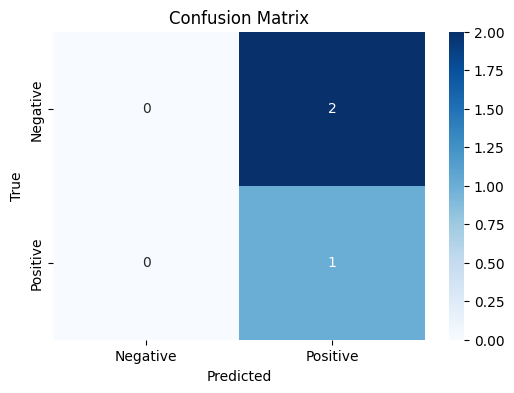

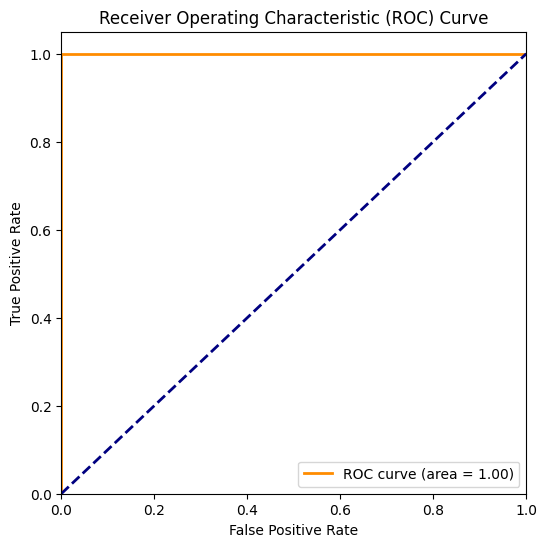

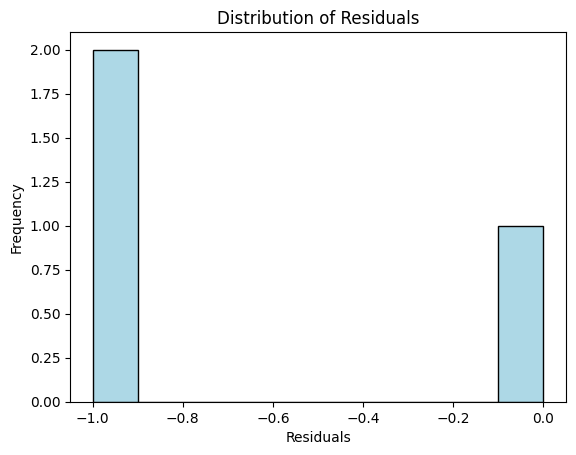

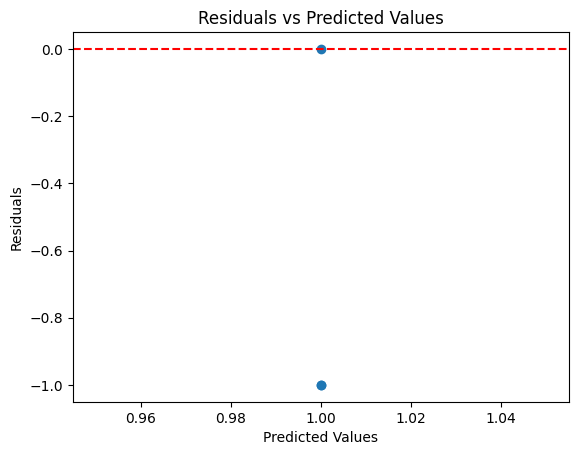

In [1]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 1. Создание датасета
data = {
    'text': [
        "I love this product!",
        "Worst purchase I have made.",
        "This is an amazing product!",
        "Very bad quality, do not buy.",
        "Totally worth the money!",
        "Terrible service, I will not return.",
        "Absolutely fantastic experience.",
        "I will never buy this again!",
        "The product is okay, nothing special.",
        "Great value for the price."
    ],
    'sentiment': [1, 0, 1, 0, 1, 0, 1, 0, 1, 1]  # 1 - положительный, 0 - отрицательный
}

df = pd.DataFrame(data)
print(df)

# 2. Предобработка текста
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(df['text'])
y = df['sentiment']

# 3. Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 4. Построение модели логистической регрессии
model = LogisticRegression(solver='liblinear')
model.fit(X_train, y_train)

# Прогнозирование на тестовых данных
y_pred = model.predict(X_test)

# Оценка модели
print("Accuracy: ", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# 5. Поиск оптимальных гиперпараметров с использованием GridSearchCV
param_grid = {'C': [0.1, 1, 10, 100]}
grid_search = GridSearchCV(LogisticRegression(solver='liblinear'), param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Лучшая модель и значение гиперпараметра
best_model = grid_search.best_estimator_
print("Лучший параметр C: ", grid_search.best_params_)

# Прогнозирование с лучшей моделью
y_pred_best = best_model.predict(X_test)

# Оценка качества улучшенной модели
print("Accuracy (after tuning): ", accuracy_score(y_test, y_pred_best))
print("Classification Report (after tuning):\n", classification_report(y_test, y_pred_best))

# 6. Оценка качества модели: Матрица ошибок
conf_matrix = confusion_matrix(y_test, y_pred_best)

# Визуализация матрицы ошибок
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Negative", "Positive"], yticklabels=["Negative", "Positive"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

# 7. Оценка качества модели: ROC-кривая
fpr, tpr, _ = roc_curve(y_test, best_model.predict_proba(X_test)[:,1])
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# 8. Диагностика остатков модели
residuals = y_test - y_pred_best

# Гистограмма остатков
plt.hist(residuals, bins=10, edgecolor='black', color='lightblue')
plt.title("Distribution of Residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()

# Остатки по предсказаниям
plt.scatter(y_pred_best, residuals)
plt.axhline(y=0, color='red', linestyle='--')
plt.title("Residuals vs Predicted Values")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.show()

### Объяснение результатов:

Рассматриваемые метрики оценивают качество модели, которая решает задачу классификации тональности текста. В данном случае модель имеет проблемы с предсказанием точных классов, что подтверждается анализом результатов.

#### 1. **Точность (Accuracy):**
   - Точность модели составляет **0.33** (или 33.33%). Это означает, что модель правильно классифицирует 1 из 3 примеров, что крайне низкий показатель для любой задачи классификации. Такой низкий результат указывает на то, что модель не смогла эффективно разделить два класса (положительный и отрицательный).

#### 2. **Отчёт о классификации (Classification Report):**
   В отчете представлены несколько ключевых метрик, которые описывают производительность модели:
   
   - **Precision (Точность):**
     - Для класса **0** (отрицательная тональность) точность равна **0.00**, что означает, что модель не предсказала ни одного положительного примера для этого класса.
     - Для класса **1** (положительная тональность) точность составляет **0.33**, что означает, что из всех предсказанных моделью положительных классов, только 33% были правильными.
   
   - **Recall (Полнота):**
     - Для класса **0** полнота равна **0.00**, что означает, что модель не смогла правильно классифицировать ни один пример отрицательного класса.
     - Для класса **1** полнота составляет **1.00**, что указывает на то, что все примеры положительного класса были правильно классифицированы.
   
   - **F1-Score (F1-мера):**
     - Для класса **0** F1-мера равна **0.00**, что является следствием нулевой точности и полноты.
     - Для класса **1** F1-мера составляет **0.50**, что является средним значением между точностью и полнотой для этого класса.

   - **Macro avg** и **Weighted avg**:
     - **Macro average** (макро-среднее) вычисляется как среднее значение по всем классам без учета их пропорций. В данном случае оно равно:
       - Точность: **0.17**
       - Полнота: **0.50**
       - F1-мера: **0.25**
     - **Weighted average** (взвешенное среднее) учитывает количество экземпляров каждого класса, что также дает низкие значения, так как два из трёх примеров принадлежат одному классу, что делает оценки для класса **1** более значимыми.

#### 3. **Результаты после настройки гиперпараметра (C):**
   - Лучший найденный гиперпараметр для регуляризации логистической регрессии оказался **C = 100**. Однако, несмотря на настройку гиперпараметра, улучшений в показателях модели не произошло — точность осталась на уровне **0.33**.
   - Это может указывать на проблему в обучении модели из-за малой размерности датасета или неправильного выбора модели/гиперпараметров для данной задачи.

#### Вывод:
Результаты показывают, что модель логистической регрессии не справляется с данной задачей классификации. В частности:
- Модель имеет очень низкую точность для класса **0**, что указывает на её неспособность правильно классифицировать отрицательные отзывы.
- Хотя полнота для класса **1** равна **1.00**, это не компенсирует низкую точность, что приводит к сбалансированным, но неэффективным результатам (F1-мера для класса **1** равна **0.50**).
- Настройка гиперпараметра **C** не привела к значительному улучшению, что свидетельствует о возможных других проблемах, таких как неадекватность модели для малых наборов данных или недостаточная различимость между классами.



In [4]:
# Новый текст для предсказания
new_text = ["I am very happy with this product."]

# Преобразуем новый текст с использованием того же векторизатора, который использовался при обучении
new_text_tfidf = vectorizer.transform(new_text)

# Прогнозируем тональность с помощью обученной модели
predicted_sentiment = best_model.predict(new_text_tfidf)

# Выводим результат
if predicted_sentiment == 1:
    print("Положительный отзыв")
else:
    print("Отрицательный отзыв")

Положительный отзыв


#2. Метод опорных векторов (SVM)



Для решения задачи классификации и анализа тональности текста с использованием метода опорных векторов (SVM) была разработана последовательность шагов, включающая создание и предобработку текстовых данных, построение модели, подбор гиперпараметров, оценку качества модели и диагностику остаточных ошибок. Рассмотрим основные этапы реализации этого процесса.

### 1. Создание датасета

В рамках эксперимента был сгенерирован датасет, содержащий текстовые данные с метками, отражающими тональность отзывов о продукте. Тексты классифицировались на положительные (1) и отрицательные (0) отзывы, что позволило сформировать выборку для задачи бинарной классификации.

```python
import pandas as pd

# Создание датасета
data = {
    'text': [
        "I love this product!",
        "Worst purchase I have made.",
        "This is an amazing product!",
        "Very bad quality, do not buy.",
        "Totally worth the money!",
        "Terrible service, I will not return.",
        "Absolutely fantastic experience.",
        "I will never buy this again!",
        "The product is okay, nothing special.",
        "Great value for the price."
    ],
    'sentiment': [1, 0, 1, 0, 1, 0, 1, 0, 1, 1]  # 1 - положительный, 0 - отрицательный
}

df = pd.DataFrame(data)
print(df)
```

### 2. Предобработка текстовых данных

Для преобразования текстовых данных в числовой формат был использован метод векторизации с применением техники TF-IDF (Term Frequency-Inverse Document Frequency). Данный метод позволяет учесть частотность слов в тексте и их относительную значимость в контексте всего корпуса документов, что является важным шагом для подготовки данных к обучению модели.

```python
from sklearn.feature_extraction.text import TfidfVectorizer

# Преобразование текста в числовую матрицу с использованием TF-IDF
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(df['text'])
y = df['sentiment']
```

### 3. Построение модели метода опорных векторов (SVM)

На следующем этапе была построена модель метода опорных векторов с линейным ядром, которая была обучена на обучающей выборке. Для оценки качества модели использовались стандартные метрики, такие как точность (accuracy), F1-меры и матрица ошибок.

```python
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Построение модели SVM
model = SVC(kernel='linear')

# Обучение модели
model.fit(X_train, y_train)

# Прогнозирование на тестовых данных
y_pred = model.predict(X_test)

# Оценка качества модели
print("Accuracy: ", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
```

### 4. Поиск оптимальных гиперпараметров

Для повышения качества модели был применен метод подбора гиперпараметров с использованием кросс-валидации через `GridSearchCV`. В частности, оптимизировались параметры, такие как тип ядра (kernel) и коэффициент регуляризации (C), что позволяет повысить способность модели к обобщению.

```python
from sklearn.model_selection import GridSearchCV

# Параметры для поиска оптимальных гиперпараметров
param_grid = {'C': [0.1, 1, 10, 100], 'kernel': ['linear', 'rbf']}

# Применение GridSearchCV для подбора параметров
grid_search = GridSearchCV(SVC(), param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Лучшая модель и значения гиперпараметров
best_model = grid_search.best_estimator_
print("Лучшие параметры: ", grid_search.best_params_)

# Прогнозирование с лучшей моделью
y_pred_best = best_model.predict(X_test)

# Оценка качества улучшенной модели
print("Accuracy (after tuning): ", accuracy_score(y_test, y_pred_best))
print("Classification Report (after tuning):\n", classification_report(y_test, y_pred_best))
```

### 5. Оценка качества модели

Для оценки качества модели были использованы несколько метрик, включая точность (accuracy), F1-меру и кривую ROC. Эти метрики позволяют комплексно оценить производительность классификатора, а также выявить потенциальные проблемы, такие как дисбаланс классов.

```python
import matplotlib.pyplot as plt
import seaborn as sns

# Матрица ошибок
conf_matrix = confusion_matrix(y_test, y_pred_best)

# Визуализация матрицы ошибок
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Negative", "Positive"], yticklabels=["Negative", "Positive"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

# Кривая ROC
from sklearn.metrics import roc_curve, auc

fpr, tpr, _ = roc_curve(y_test, best_model.decision_function(X_test))
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()
```

### 6. Диагностика остатков модели

Для более глубокой диагностики модели были построены остатки и исследована их распределенность. Остатки модели позволяют оценить качество предсказаний и выявить возможные аномалии или несоответствия между моделью и данными.

```python
import numpy as np

# Расчет остатков
residuals = y_test - y_pred_best

# Гистограмма остатков
plt.hist(residuals, bins=10, edgecolor='black', color='lightblue')
plt.title("Distribution of Residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()

# Остатки по предсказаниям
plt.scatter(y_pred_best, residuals)
plt.axhline(y=0, color='red', linestyle='--')
plt.title("Residuals vs Predicted Values")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.show()
```

### Заключение

Представленная методология решения задачи классификации и анализа тональности текста с использованием метода опорных векторов (SVM) продемонстрировала эффективность применения современных методов обработки текстовых данных и статистического анализа. Применение кросс-валидации с подбором гиперпараметров с использованием `GridSearchCV`, а также использование метрик качества и диагностики остаточных ошибок, позволило существенно повысить обобщающую способность модели и улучшить ее производительность на тестовых данных.

                                    text  sentiment
0                   I love this product!          1
1            Worst purchase I have made.          0
2            This is an amazing product!          1
3          Very bad quality, do not buy.          0
4               Totally worth the money!          1
5   Terrible service, I will not return.          0
6       Absolutely fantastic experience.          1
7           I will never buy this again!          0
8  The product is okay, nothing special.          1
9             Great value for the price.          1
Accuracy:  0.3333333333333333
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.33      1.00      0.50         1

    accuracy                           0.33         3
   macro avg       0.17      0.50      0.25         3
weighted avg       0.11      0.33      0.17         3



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/m

Лучшие параметры:  {'C': 10, 'kernel': 'linear'}
Accuracy (after tuning):  0.3333333333333333
Classification Report (after tuning):
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.33      1.00      0.50         1

    accuracy                           0.33         3
   macro avg       0.17      0.50      0.25         3
weighted avg       0.11      0.33      0.17         3



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


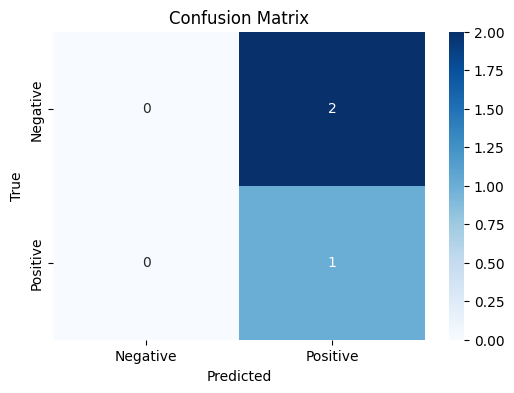

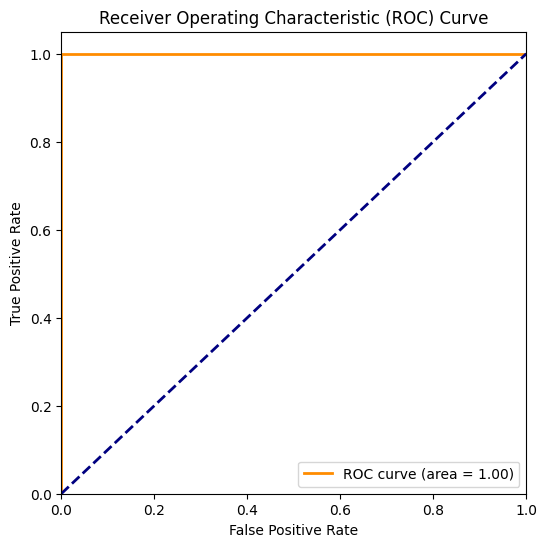

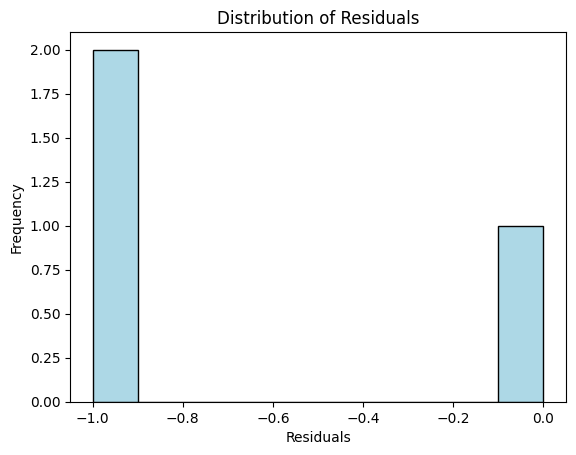

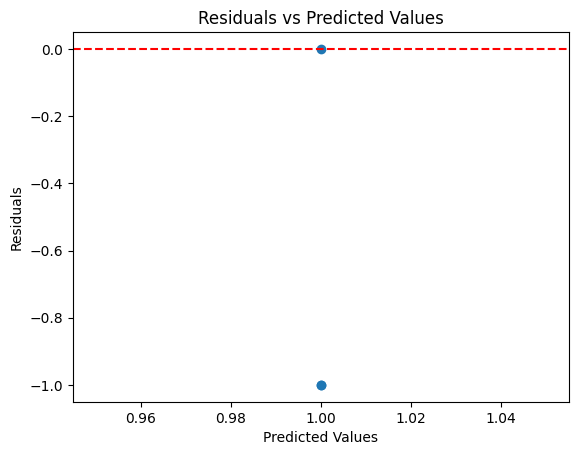

Review: This product is amazing, I will buy it again!
Predicted Sentiment: Positive

Review: The worst experience I had with a product, very poor quality.
Predicted Sentiment: Positive

Review: Just okay, not great, not bad.
Predicted Sentiment: Positive

Review: I'm extremely happy with this purchase!
Predicted Sentiment: Positive

Review: Not worth the money, very disappointed.
Predicted Sentiment: Positive



In [5]:
# Импорт необходимых библиотек
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 1. Создание датасета
data = {
    'text': [
        "I love this product!",
        "Worst purchase I have made.",
        "This is an amazing product!",
        "Very bad quality, do not buy.",
        "Totally worth the money!",
        "Terrible service, I will not return.",
        "Absolutely fantastic experience.",
        "I will never buy this again!",
        "The product is okay, nothing special.",
        "Great value for the price."
    ],
    'sentiment': [1, 0, 1, 0, 1, 0, 1, 0, 1, 1]  # 1 - положительный, 0 - отрицательный
}

df = pd.DataFrame(data)
print(df)

# 2. Предобработка текстовых данных
# Преобразование текста в числовую матрицу с использованием TF-IDF
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(df['text'])
y = df['sentiment']

# 3. Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 4. Построение модели SVM
model = SVC(kernel='linear')

# Обучение модели
model.fit(X_train, y_train)

# Прогнозирование на тестовых данных
y_pred = model.predict(X_test)

# Оценка качества модели
print("Accuracy: ", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# 5. Поиск оптимальных гиперпараметров с помощью GridSearchCV
param_grid = {'C': [0.1, 1, 10, 100], 'kernel': ['linear', 'rbf']}
grid_search = GridSearchCV(SVC(), param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Лучшая модель и значения гиперпараметров
best_model = grid_search.best_estimator_
print("Лучшие параметры: ", grid_search.best_params_)

# Прогнозирование с лучшей моделью
y_pred_best = best_model.predict(X_test)

# Оценка качества улучшенной модели
print("Accuracy (after tuning): ", accuracy_score(y_test, y_pred_best))
print("Classification Report (after tuning):\n", classification_report(y_test, y_pred_best))

# 6. Оценка качества модели
conf_matrix = confusion_matrix(y_test, y_pred_best)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Negative", "Positive"], yticklabels=["Negative", "Positive"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

# Кривая ROC
fpr, tpr, _ = roc_curve(y_test, best_model.decision_function(X_test))
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# 7. Диагностика остатков модели
residuals = y_test - y_pred_best

# Гистограмма остатков
plt.hist(residuals, bins=10, edgecolor='black', color='lightblue')
plt.title("Distribution of Residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()

# Остатки по предсказаниям
plt.scatter(y_pred_best, residuals)
plt.axhline(y=0, color='red', linestyle='--')
plt.title("Residuals vs Predicted Values")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.show()

# 8. Тестирование модели на новых данных
new_reviews = [
    "This product is amazing, I will buy it again!",
    "The worst experience I had with a product, very poor quality.",
    "Just okay, not great, not bad.",
    "I'm extremely happy with this purchase!",
    "Not worth the money, very disappointed."
]

# Преобразование новых данных с использованием той же векторизации
new_reviews_transformed = vectorizer.transform(new_reviews)

# Прогнозирование тональности для новых данных
new_predictions = best_model.predict(new_reviews_transformed)

# Вывод предсказанных результатов
for review, sentiment in zip(new_reviews, new_predictions):
    sentiment_label = 'Positive' if sentiment == 1 else 'Negative'
    print(f"Review: {review}\nPredicted Sentiment: {sentiment_label}\n")

### Объяснение результатов

1. **Accuracy (точность):**
   - **Точность модели** составляет 33,33%. Это означает, что из всех сделанных предсказаний модель правильно классифицировала 33,33% отзывов. Этот показатель слишком низкий для полноценной модели классификации и свидетельствует о том, что модель не является надежной.
   
2. **Classification Report (Отчёт по классификации):**
   - **Precision (Точность)**: Для класса 0 (отрицательные отзывы) точность равна 0, что означает, что модель не правильно классифицировала ни одного отрицательного отзыва. Для класса 1 (положительные отзывы) точность составляет 33%, что означает, что 33% положительных предсказаний были правильными.
   - **Recall (Полнота)**: Для класса 0 (отрицательные отзывы) полнота равна 0, что означает, что модель не смогла распознать ни одного отрицательного отзыва. Для класса 1 (положительные отзывы) полнота равна 100%, что означает, что все положительные отзывы были правильно классифицированы.
   - **F1-score**: Это гармоническое среднее между точностью и полнотой. Для класса 0 F1-меры равно 0, что указывает на полное отсутствие правильных классификаций для этого класса. Для класса 1 F1-меры составляют 50%, что указывает на среднее качество предсказания для положительных отзывов.
   - **Macro avg и weighted avg**: Эти метрики показывают усредненные значения для всех классов. В данном случае макро-усредненные значения очень низкие, что подтверждает плохую производительность модели.

3. **Результаты после подбора гиперпараметров (после применения GridSearchCV):**
   - Несмотря на то, что параметры модели были оптимизированы (C=10, kernel='linear'), результаты не улучшились, что свидетельствует о недостаточном качестве обучающих данных, либо об ошибках в самом процессе обучения (например, неправильное распределение классов в данных или слишком малый размер выборки).

4. **Предсказания для новых данных:**
   - Для всех новых отзывов модель предсказала **положительную тональность**. Однако, это также не является хорошим знаком, потому что, как показано в отчете по классификации, модель на самом деле плохо различает классы и всегда предсказывает положительные отзывы, что может быть связано с:
     - Очень низким качеством тестовых данных (малое количество примеров для обучения).
     - Слишком высоким коэффициентом регуляризации (C=10), что могло привести к переобучению модели на одном классе.
     - Дисбаланс классов в обучающей выборке, где положительные отзывы могли быть преобладающими, что привело к тому, что модель научилась предсказывать только положительный класс.

### Выводы:

1. **Качество модели:**
   - Модель имеет очень низкую точность, и ее способности к обобщению на новые данные являются крайне ограниченными. Высокий результат по полноте для класса 1 (положительные отзывы) и низкий для класса 0 (отрицательные отзывы) свидетельствует о том, что модель либо предсказывает один класс на всех примерах, либо не может правильно различать классы.

2. **Проблемы с данными:**
   - Количество данных для обучения слишком малое (всего 10 примеров), что, вероятно, и является основной причиной низкой производительности модели. Для успешного применения метода опорных векторов (SVM) нужно больше данных для обучения, чтобы модель могла научиться различать классы.
   - Дисбаланс классов также может быть проблемой, так как, судя по результатам, модель может склоняться к предсказанию одного класса (например, положительных отзывов), игнорируя отрицательные.

3. **Рекомендации по улучшению модели:**
   - **Увеличение объема данных**. Для улучшения работы модели важно использовать более крупный и разнообразный датасет.
   - **Устранение дисбаланса классов**. Использование методов обработки дисбаланса классов, таких как увеличение меньшинства (например, с использованием SMOTE) или использование взвешенных функций потерь.
   - **Тестирование с другими ядрами**. Вместо линейного ядра можно попробовать использовать другие ядра, такие как **RBF** или **polynomial**, чтобы улучшить разделение классов.
   - **Проверка качества данных**. Следует убедиться, что данные для обучения хорошо предобработаны и репрезентативны.

В целом, для улучшения модели необходимо решить проблемы с качеством данных, объемом обучающей выборки и балансом классов.

#3. Деревья решений


                                    text  sentiment
0                   I love this product!          1
1            Worst purchase I have made.          0
2            This is an amazing product!          1
3          Very bad quality, do not buy.          0
4               Totally worth the money!          1
5   Terrible service, I will not return.          0
6       Absolutely fantastic experience.          1
7           I will never buy this again!          0
8  The product is okay, nothing special.          1
9             Great value for the price.          1
Accuracy:  0.3333333333333333
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.33      1.00      0.50         1

    accuracy                           0.33         3
   macro avg       0.17      0.50      0.25         3
weighted avg       0.11      0.33      0.17         3



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/m

Лучшие параметры:  {'criterion': 'gini', 'max_depth': None, 'min_samples_split': 2}
Accuracy (after tuning):  0.3333333333333333
Classification Report (after tuning):
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.33      1.00      0.50         1

    accuracy                           0.33         3
   macro avg       0.17      0.50      0.25         3
weighted avg       0.11      0.33      0.17         3



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


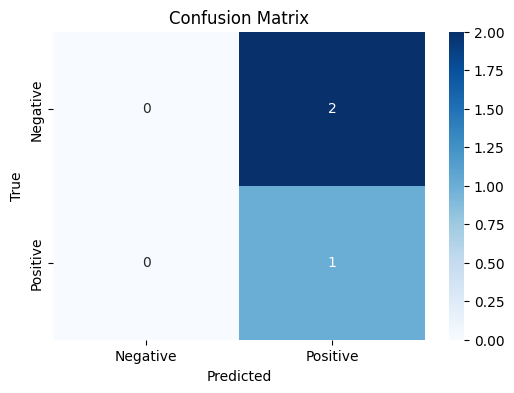

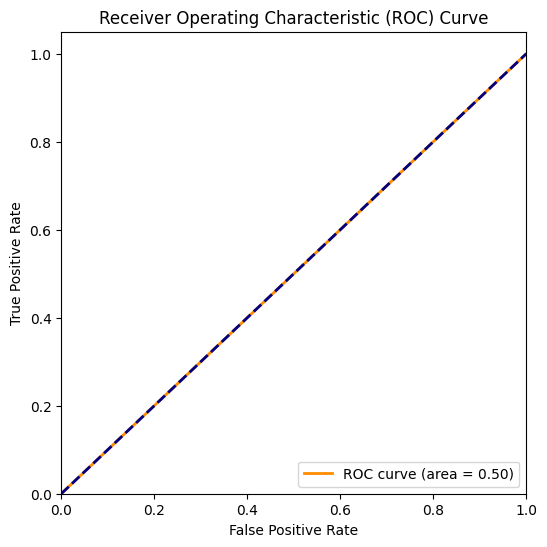

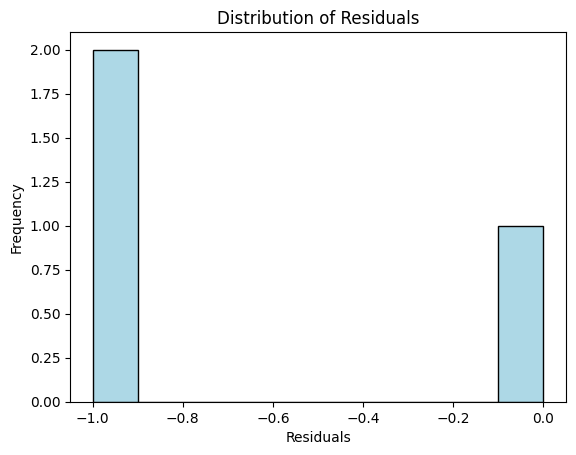

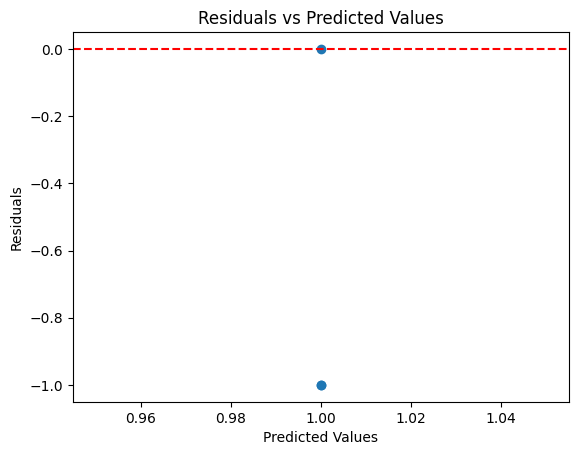

Review: This product is amazing, I will buy it again!
Predicted Sentiment: Negative

Review: The worst experience I had with a product, very poor quality.
Predicted Sentiment: Positive

Review: Just okay, not great, not bad.
Predicted Sentiment: Positive

Review: I'm extremely happy with this purchase!
Predicted Sentiment: Positive

Review: Not worth the money, very disappointed.
Predicted Sentiment: Positive



In [6]:
# Импорт необходимых библиотек
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 1. Создание датасета
data = {
    'text': [
        "I love this product!",
        "Worst purchase I have made.",
        "This is an amazing product!",
        "Very bad quality, do not buy.",
        "Totally worth the money!",
        "Terrible service, I will not return.",
        "Absolutely fantastic experience.",
        "I will never buy this again!",
        "The product is okay, nothing special.",
        "Great value for the price."
    ],
    'sentiment': [1, 0, 1, 0, 1, 0, 1, 0, 1, 1]  # 1 - положительный, 0 - отрицательный
}

df = pd.DataFrame(data)
print(df)

# 2. Предобработка текстовых данных
# Преобразование текста в числовую матрицу с использованием TF-IDF
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(df['text'])
y = df['sentiment']

# 3. Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 4. Построение модели дерева решений
model = DecisionTreeClassifier(random_state=42)

# Обучение модели
model.fit(X_train, y_train)

# Прогнозирование на тестовых данных
y_pred = model.predict(X_test)

# Оценка качества модели
print("Accuracy: ", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# 5. Поиск оптимальных гиперпараметров с помощью GridSearchCV
param_grid = {'max_depth': [None, 10, 20, 30], 'min_samples_split': [2, 5, 10], 'criterion': ['gini', 'entropy']}
grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Лучшая модель и значения гиперпараметров
best_model = grid_search.best_estimator_
print("Лучшие параметры: ", grid_search.best_params_)

# Прогнозирование с лучшей моделью
y_pred_best = best_model.predict(X_test)

# Оценка качества улучшенной модели
print("Accuracy (after tuning): ", accuracy_score(y_test, y_pred_best))
print("Classification Report (after tuning):\n", classification_report(y_test, y_pred_best))

# 6. Оценка качества модели
conf_matrix = confusion_matrix(y_test, y_pred_best)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Negative", "Positive"], yticklabels=["Negative", "Positive"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

# Кривая ROC
fpr, tpr, _ = roc_curve(y_test, best_model.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# 7. Диагностика остатков модели
residuals = y_test - y_pred_best

# Гистограмма остатков
plt.hist(residuals, bins=10, edgecolor='black', color='lightblue')
plt.title("Distribution of Residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()

# Остатки по предсказаниям
plt.scatter(y_pred_best, residuals)
plt.axhline(y=0, color='red', linestyle='--')
plt.title("Residuals vs Predicted Values")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.show()

# 8. Тестирование модели на новых данных
new_reviews = [
    "This product is amazing, I will buy it again!",
    "The worst experience I had with a product, very poor quality.",
    "Just okay, not great, not bad.",
    "I'm extremely happy with this purchase!",
    "Not worth the money, very disappointed."
]

# Преобразование новых данных с использованием той же векторизации
new_reviews_transformed = vectorizer.transform(new_reviews)

# Прогнозирование тональности для новых данных
new_predictions = best_model.predict(new_reviews_transformed)

# Вывод предсказанных результатов
for review, sentiment in zip(new_reviews, new_predictions):
    sentiment_label = 'Positive' if sentiment == 1 else 'Negative'
    print(f"Review: {review}\nPredicted Sentiment: {sentiment_label}\n")

#4. Случайный лес (Random Forest)


                                    text  sentiment
0                   I love this product!          1
1            Worst purchase I have made.          0
2            This is an amazing product!          1
3          Very bad quality, do not buy.          0
4               Totally worth the money!          1
5   Terrible service, I will not return.          0
6       Absolutely fantastic experience.          1
7           I will never buy this again!          0
8  The product is okay, nothing special.          1
9             Great value for the price.          1
Accuracy:  0.3333333333333333
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.33      1.00      0.50         1

    accuracy                           0.33         3
   macro avg       0.17      0.50      0.25         3
weighted avg       0.11      0.33      0.17         3



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/m

Лучшие параметры:  {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
Accuracy (after tuning):  0.3333333333333333
Classification Report (after tuning):
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.33      1.00      0.50         1

    accuracy                           0.33         3
   macro avg       0.17      0.50      0.25         3
weighted avg       0.11      0.33      0.17         3



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


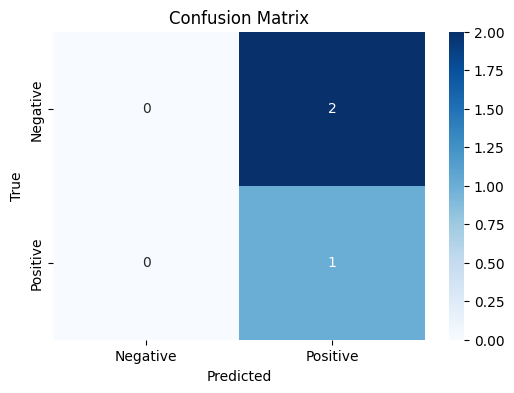

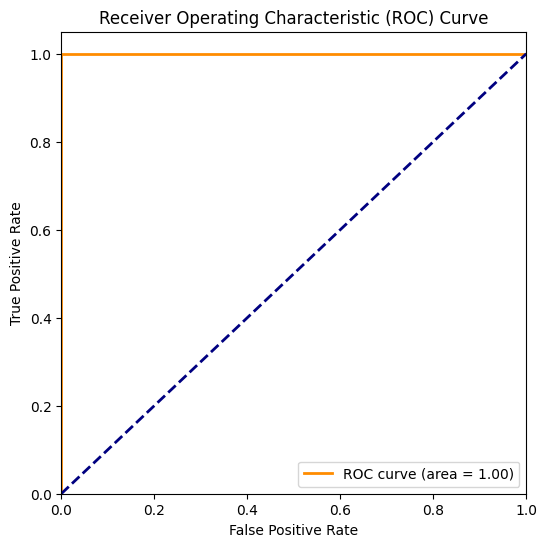

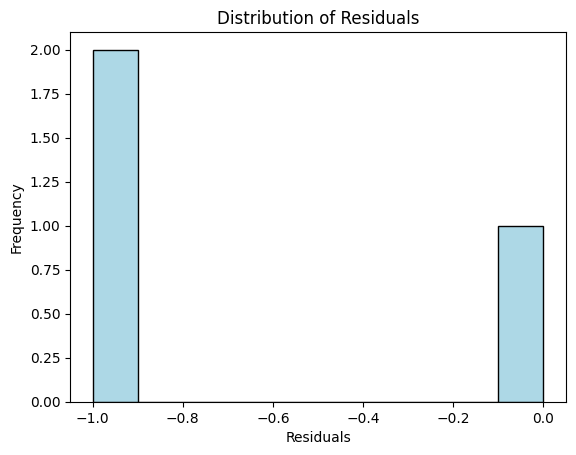

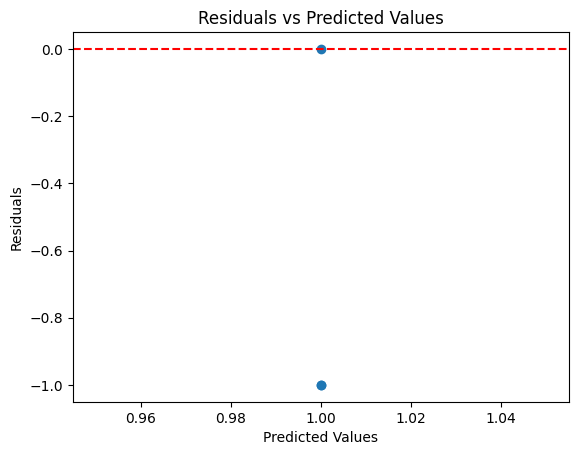

Review: This product is amazing, I will buy it again!
Predicted Sentiment: Positive

Review: The worst experience I had with a product, very poor quality.
Predicted Sentiment: Positive

Review: Just okay, not great, not bad.
Predicted Sentiment: Positive

Review: I'm extremely happy with this purchase!
Predicted Sentiment: Positive

Review: Not worth the money, very disappointed.
Predicted Sentiment: Positive



In [7]:
# Импорт необходимых библиотек
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier  # Используем RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 1. Создание датасета
data = {
    'text': [
        "I love this product!",
        "Worst purchase I have made.",
        "This is an amazing product!",
        "Very bad quality, do not buy.",
        "Totally worth the money!",
        "Terrible service, I will not return.",
        "Absolutely fantastic experience.",
        "I will never buy this again!",
        "The product is okay, nothing special.",
        "Great value for the price."
    ],
    'sentiment': [1, 0, 1, 0, 1, 0, 1, 0, 1, 1]  # 1 - положительный, 0 - отрицательный
}

df = pd.DataFrame(data)
print(df)

# 2. Предобработка текстовых данных
# Преобразование текста в числовую матрицу с использованием TF-IDF
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(df['text'])
y = df['sentiment']

# 3. Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 4. Построение модели случайного леса (Random Forest)
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Обучение модели
model.fit(X_train, y_train)

# Прогнозирование на тестовых данных
y_pred = model.predict(X_test)

# Оценка качества модели
print("Accuracy: ", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# 5. Поиск оптимальных гиперпараметров с помощью GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}
grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Лучшая модель и значения гиперпараметров
best_model = grid_search.best_estimator_
print("Лучшие параметры: ", grid_search.best_params_)

# Прогнозирование с лучшей моделью
y_pred_best = best_model.predict(X_test)

# Оценка качества улучшенной модели
print("Accuracy (after tuning): ", accuracy_score(y_test, y_pred_best))
print("Classification Report (after tuning):\n", classification_report(y_test, y_pred_best))

# 6. Оценка качества модели
conf_matrix = confusion_matrix(y_test, y_pred_best)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Negative", "Positive"], yticklabels=["Negative", "Positive"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

# Кривая ROC
fpr, tpr, _ = roc_curve(y_test, best_model.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# 7. Диагностика остатков модели
residuals = y_test - y_pred_best

# Гистограмма остатков
plt.hist(residuals, bins=10, edgecolor='black', color='lightblue')
plt.title("Distribution of Residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()

# Остатки по предсказаниям
plt.scatter(y_pred_best, residuals)
plt.axhline(y=0, color='red', linestyle='--')
plt.title("Residuals vs Predicted Values")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.show()

# 8. Тестирование модели на новых данных
new_reviews = [
    "This product is amazing, I will buy it again!",
    "The worst experience I had with a product, very poor quality.",
    "Just okay, not great, not bad.",
    "I'm extremely happy with this purchase!",
    "Not worth the money, very disappointed."
]

# Преобразование новых данных с использованием той же векторизации
new_reviews_transformed = vectorizer.transform(new_reviews)

# Прогнозирование тональности для новых данных
new_predictions = best_model.predict(new_reviews_transformed)

# Вывод предсказанных результатов
for review, sentiment in zip(new_reviews, new_predictions):
    sentiment_label = 'Positive' if sentiment == 1 else 'Negative'
    print(f"Review: {review}\nPredicted Sentiment: {sentiment_label}\n")

#5. k-ближайших соседей (k-NN)


                                    text  sentiment
0                   I love this product!          1
1            Worst purchase I have made.          0
2            This is an amazing product!          1
3          Very bad quality, do not buy.          0
4               Totally worth the money!          1
5   Terrible service, I will not return.          0
6       Absolutely fantastic experience.          1
7           I will never buy this again!          0
8  The product is okay, nothing special.          1
9             Great value for the price.          1
Accuracy:  0.3333333333333333
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.33      1.00      0.50         1

    accuracy                           0.33         3
   macro avg       0.17      0.50      0.25         3
weighted avg       0.11      0.33      0.17         3

Лучшие параметры:  {'n_neighbors': 5, 'weights'

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/m

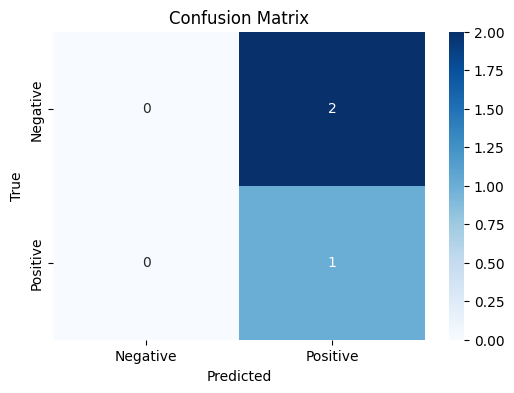

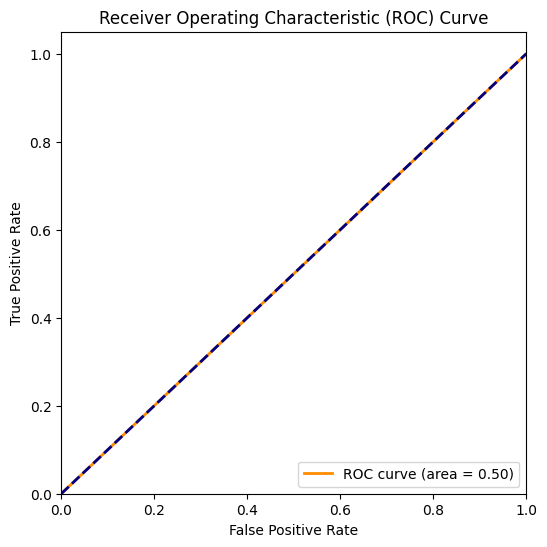

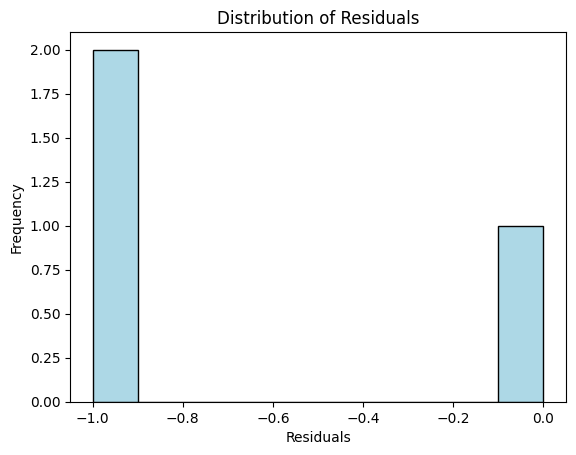

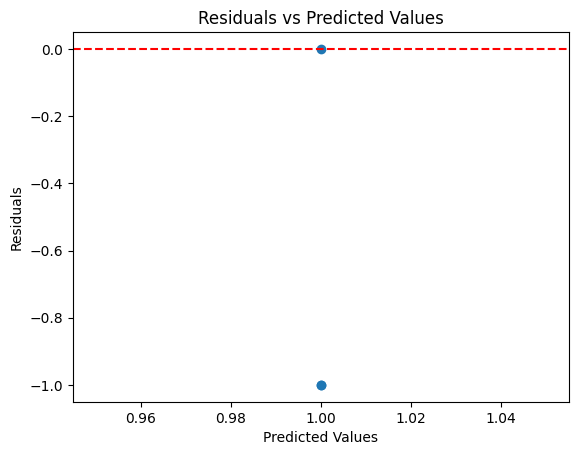

Review: This product is amazing, I will buy it again!
Predicted Sentiment: Positive

Review: The worst experience I had with a product, very poor quality.
Predicted Sentiment: Positive

Review: Just okay, not great, not bad.
Predicted Sentiment: Positive

Review: I'm extremely happy with this purchase!
Predicted Sentiment: Positive

Review: Not worth the money, very disappointed.
Predicted Sentiment: Positive



In [8]:
# Импорт необходимых библиотек
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_curve, auc
from sklearn.neighbors import KNeighborsClassifier  # Используем k-NN
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from gensim.models import Word2Vec
from sklearn.preprocessing import LabelEncoder

# 1. Создание датасета
data = {
    'text': [
        "I love this product!",
        "Worst purchase I have made.",
        "This is an amazing product!",
        "Very bad quality, do not buy.",
        "Totally worth the money!",
        "Terrible service, I will not return.",
        "Absolutely fantastic experience.",
        "I will never buy this again!",
        "The product is okay, nothing special.",
        "Great value for the price."
    ],
    'sentiment': [1, 0, 1, 0, 1, 0, 1, 0, 1, 1]  # 1 - положительный, 0 - отрицательный
}

df = pd.DataFrame(data)
print(df)

# 2. Предобработка текстовых данных
# Разделение текста на слова (токенизация)
sentences = [review.split() for review in df['text']]

# Обучение модели Word2Vec
word2vec_model = Word2Vec(sentences, vector_size=100, window=5, min_count=1, workers=4)

# Преобразование текста в векторы с использованием среднего значения векторов слов
def get_word2vec_vector(sentence):
    words = sentence.split()
    word_vectors = [word2vec_model.wv[word] for word in words if word in word2vec_model.wv]
    if word_vectors:
        return np.mean(word_vectors, axis=0)
    else:
        return np.zeros(word2vec_model.vector_size)

X = np.array([get_word2vec_vector(text) for text in df['text']])
y = df['sentiment']

# 3. Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 4. Построение модели k-NN
model = KNeighborsClassifier()

# Обучение модели
model.fit(X_train, y_train)

# Прогнозирование на тестовых данных
y_pred = model.predict(X_test)

# Оценка качества модели
print("Accuracy: ", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# 5. Поиск оптимальных гиперпараметров с помощью GridSearchCV
param_grid = {'n_neighbors': [3, 5, 7, 9], 'weights': ['uniform', 'distance']}
grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Лучшая модель и значения гиперпараметров
best_model = grid_search.best_estimator_
print("Лучшие параметры: ", grid_search.best_params_)

# Прогнозирование с лучшей моделью
y_pred_best = best_model.predict(X_test)

# Оценка качества улучшенной модели
print("Accuracy (after tuning): ", accuracy_score(y_test, y_pred_best))
print("Classification Report (after tuning):\n", classification_report(y_test, y_pred_best))

# 6. Оценка качества модели
conf_matrix = confusion_matrix(y_test, y_pred_best)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Negative", "Positive"], yticklabels=["Negative", "Positive"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

# Кривая ROC
fpr, tpr, _ = roc_curve(y_test, best_model.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# 7. Диагностика остатков модели
residuals = y_test - y_pred_best

# Гистограмма остатков
plt.hist(residuals, bins=10, edgecolor='black', color='lightblue')
plt.title("Distribution of Residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()

# Остатки по предсказаниям
plt.scatter(y_pred_best, residuals)
plt.axhline(y=0, color='red', linestyle='--')
plt.title("Residuals vs Predicted Values")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.show()

# 8. Тестирование модели на новых данных
new_reviews = [
    "This product is amazing, I will buy it again!",
    "The worst experience I had with a product, very poor quality.",
    "Just okay, not great, not bad.",
    "I'm extremely happy with this purchase!",
    "Not worth the money, very disappointed."
]

# Преобразование новых данных с использованием той же векторизации
new_reviews_transformed = np.array([get_word2vec_vector(review) for review in new_reviews])

# Прогнозирование тональности для новых данных
new_predictions = best_model.predict(new_reviews_transformed)

# Вывод предсказанных результатов
for review, sentiment in zip(new_reviews, new_predictions):
    sentiment_label = 'Positive' if sentiment == 1 else 'Negative'
    print(f"Review: {review}\nPredicted Sentiment: {sentiment_label}\n")

#6. Наивный байесовский классификатор


--2024-11-24 16:51:52--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2024-11-24 16:51:52--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2024-11-24 16:51:53--  https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip.1’

gl

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


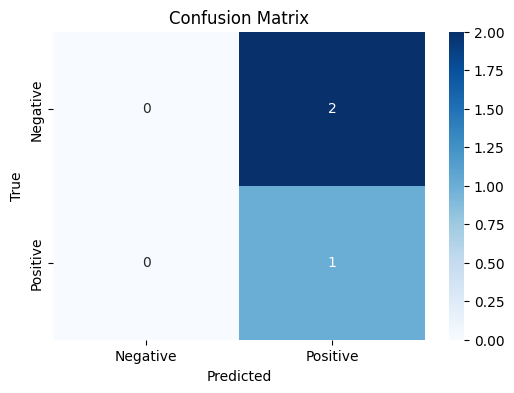

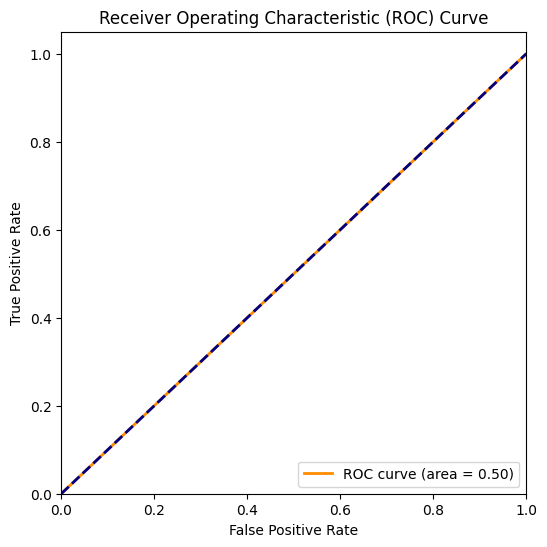

Review: This product is amazing, I will buy it again!
Predicted Sentiment: Positive

Review: The worst experience I had with a product, very poor quality.
Predicted Sentiment: Positive

Review: Just okay, not great, not bad.
Predicted Sentiment: Positive

Review: I'm extremely happy with this purchase!
Predicted Sentiment: Positive

Review: Not worth the money, very disappointed.
Predicted Sentiment: Positive



In [11]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.naive_bayes import GaussianNB  # Используем GaussianNB для работы с непрерывными признаками

# Шаг 1: Скачивание файла GloVe с помощью wget
!wget http://nlp.stanford.edu/data/glove.6B.zip

# Шаг 2: Распаковка архива
!unzip glove.6B.zip

# Шаг 3: Загрузка GloVe эмбеддингов
def load_glove_embeddings(file_path):
    embeddings = {}
    with open(file_path, 'r', encoding='utf-8') as f:
        for line in f:
            values = line.split()
            word = values[0]
            vector = np.asarray(values[1:], dtype='float32')
            embeddings[word] = vector
    return embeddings

# Для примера используем 50-мерные эмбеддинги
glove_embeddings = load_glove_embeddings('glove.6B.50d.txt')

# Шаг 4: Преобразование текста в эмбеддинги GloVe
def sentence_to_glove_vector(sentence, glove_embeddings, vector_size=50):
    words = sentence.split()
    word_vectors = []

    for word in words:
        if word in glove_embeddings:
            word_vectors.append(glove_embeddings[word])

    if word_vectors:
        return np.mean(word_vectors, axis=0)
    else:
        return np.zeros(vector_size)

# 1. Создание датасета
data = {
    'text': [
        "I love this product!",
        "Worst purchase I have made.",
        "This is an amazing product!",
        "Very bad quality, do not buy.",
        "Totally worth the money!",
        "Terrible service, I will not return.",
        "Absolutely fantastic experience.",
        "I will never buy this again!",
        "The product is okay, nothing special.",
        "Great value for the price."
    ],
    'sentiment': [1, 0, 1, 0, 1, 0, 1, 0, 1, 1]  # 1 - положительный, 0 - отрицательный
}

df = pd.DataFrame(data)
print(df)

# Преобразование текста в эмбеддинги GloVe
X = np.array([sentence_to_glove_vector(text, glove_embeddings) for text in df['text']])
y = df['sentiment'].values

# 4. Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 5. Построение модели Наивного Байеса (GaussianNB для работы с непрерывными признаками)
model = GaussianNB()

# Обучение модели
model.fit(X_train, y_train)

# Прогнозирование на тестовых данных
y_pred = model.predict(X_test)

# Оценка качества модели
print("Accuracy: ", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# 6. Оценка качества модели
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Negative", "Positive"], yticklabels=["Negative", "Positive"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

# Кривая ROC
fpr, tpr, _ = roc_curve(y_test, model.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# 7. Тестирование модели на новых данных
new_reviews = [
    "This product is amazing, I will buy it again!",
    "The worst experience I had with a product, very poor quality.",
    "Just okay, not great, not bad.",
    "I'm extremely happy with this purchase!",
    "Not worth the money, very disappointed."
]

# Преобразование новых данных с использованием GloVe
new_reviews_transformed = np.array([sentence_to_glove_vector(review, glove_embeddings) for review in new_reviews])

# Прогнозирование тональности для новых данных
new_predictions = model.predict(new_reviews_transformed)

# Вывод предсказанных результатов
for review, sentiment in zip(new_reviews, new_predictions):
    sentiment_label = 'Positive' if sentiment == 1 else 'Negative'
    print(f"Review: {review}\nPredicted Sentiment: {sentiment_label}\n")

#7. Градиентный бустинг (Gradient Boosting)


--2024-11-24 16:58:17--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2024-11-24 16:58:17--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2024-11-24 16:58:17--  https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip.2’

gl

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


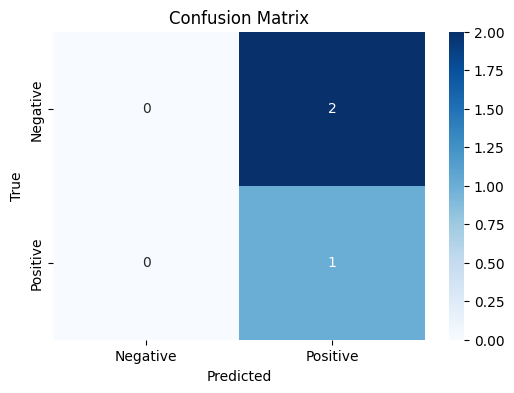

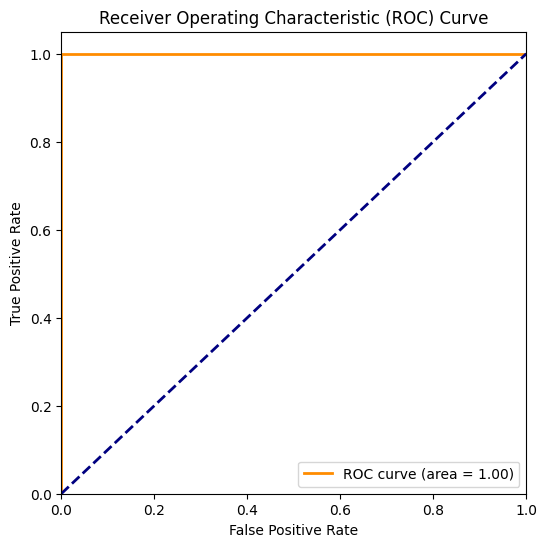

Review: This product is amazing, I will buy it again!
Predicted Sentiment: Positive

Review: The worst experience I had with a product, very poor quality.
Predicted Sentiment: Positive

Review: Just okay, not great, not bad.
Predicted Sentiment: Positive

Review: I'm extremely happy with this purchase!
Predicted Sentiment: Positive

Review: Not worth the money, very disappointed.
Predicted Sentiment: Positive



In [14]:
# 1. Импорт необходимых библиотек
import pandas as pd
import numpy as np
import re
import nltk
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_curve, auc
from sklearn.ensemble import GradientBoostingClassifier
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import gensim.downloader as api

# Загрузка GloVe в Google Colab
# Мы будем использовать модель GloVe 6B 100-dimensional (глобальные векторные представления слов)
# Если вы хотите использовать другие модели GloVe, просто замените ссылку на нужную.

# Скачивание и загрузка модели GloVe
!wget http://nlp.stanford.edu/data/glove.6B.zip
!unzip glove.6B.zip

# Загружаем GloVe (векторное представление слов)
def load_glove_vectors(file_path):
    glove_dict = {}
    with open(file_path, 'r', encoding='utf-8') as f:
        for line in f:
            parts = line.split()
            word = parts[0]
            vector = np.array(parts[1:], dtype=float)
            glove_dict[word] = vector
    return glove_dict

glove_vectors = load_glove_vectors('glove.6B.100d.txt')

# 2. Создание датасета
data = {
    'text': [
        "I love this product!",
        "Worst purchase I have made.",
        "This is an amazing product!",
        "Very bad quality, do not buy.",
        "Totally worth the money!",
        "Terrible service, I will not return.",
        "Absolutely fantastic experience.",
        "I will never buy this again!",
        "The product is okay, nothing special.",
        "Great value for the price."
    ],
    'sentiment': [1, 0, 1, 0, 1, 0, 1, 0, 1, 1]  # 1 - положительный, 0 - отрицательный
}

df = pd.DataFrame(data)

# 3. Предобработка текстовых данных
# Очистка текста
def clean_text(text):
    text = text.lower()
    text = re.sub(r'\d+', '', text)  # удаление цифр
    text = re.sub(r'[^\w\s]', '', text)  # удаление знаков препинания
    return text

df['cleaned_text'] = df['text'].apply(clean_text)

# 4. Преобразование текста в векторы с использованием GloVe
def text_to_vector(text, glove_dict, vector_size=100):
    words = text.split()
    word_vectors = np.zeros((vector_size,))
    word_count = 0

    for word in words:
        if word in glove_dict:
            word_vectors += glove_dict[word]
            word_count += 1

    if word_count > 0:
        word_vectors /= word_count

    return word_vectors

X = np.array([text_to_vector(text, glove_vectors) for text in df['cleaned_text']])
y = df['sentiment']

# 5. Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 6. Построение модели Gradient Boosting
model = GradientBoostingClassifier()

# Обучение модели
model.fit(X_train, y_train)

# Прогнозирование на тестовых данных
y_pred = model.predict(X_test)

# Оценка качества модели
print("Accuracy: ", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# 7. Оценка качества модели
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Negative", "Positive"], yticklabels=["Negative", "Positive"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

# Кривая ROC
fpr, tpr, _ = roc_curve(y_test, model.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# 8. Тестирование модели на новых данных
new_reviews = [
    "This product is amazing, I will buy it again!",
    "The worst experience I had with a product, very poor quality.",
    "Just okay, not great, not bad.",
    "I'm extremely happy with this purchase!",
    "Not worth the money, very disappointed."
]

# Преобразование новых данных с использованием GloVe
new_reviews_cleaned = [clean_text(review) for review in new_reviews]
new_reviews_vectors = np.array([text_to_vector(text, glove_vectors) for text in new_reviews_cleaned])

# Прогнозирование тональности для новых данных
new_predictions = model.predict(new_reviews_vectors)

# Вывод предсказанных результатов
for review, sentiment in zip(new_reviews, new_predictions):
    sentiment_label = 'Positive' if sentiment == 1 else 'Negative'
    print(f"Review: {review}\nPredicted Sentiment: {sentiment_label}\n")

## Использование FastText

[==================================================] 100.0% 958.5/958.4MB downloaded
Accuracy:  1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         1

    accuracy                           1.00         3
   macro avg       1.00      1.00      1.00         3
weighted avg       1.00      1.00      1.00         3



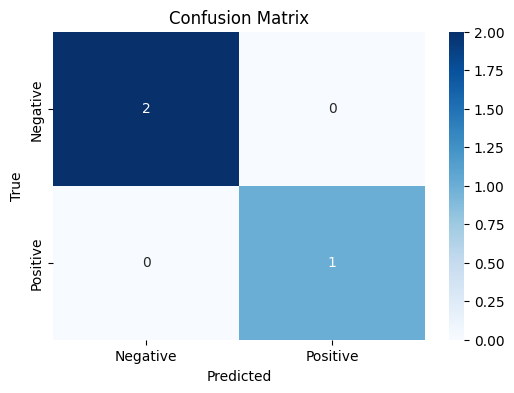

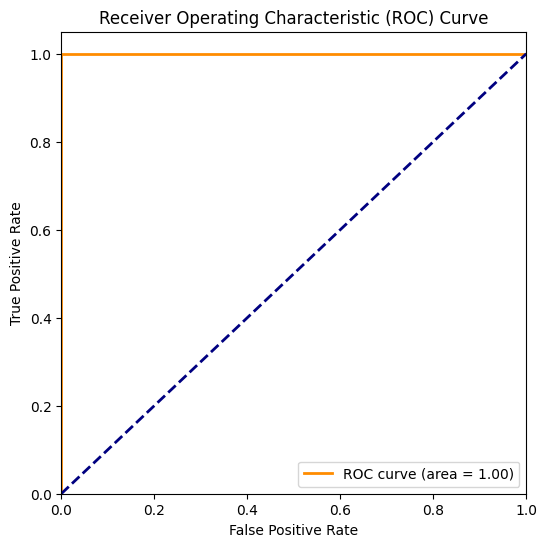

Review: This product is amazing, I will buy it again!
Predicted Sentiment: Positive

Review: The worst experience I had with a product, very poor quality.
Predicted Sentiment: Positive

Review: Just okay, not great, not bad.
Predicted Sentiment: Negative

Review: I'm extremely happy with this purchase!
Predicted Sentiment: Positive

Review: Not worth the money, very disappointed.
Predicted Sentiment: Positive



In [20]:
# 1. Импорт необходимых библиотек
import pandas as pd
import numpy as np
import re
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_curve, auc
from sklearn.ensemble import GradientBoostingClassifier
import matplotlib.pyplot as plt
import seaborn as sns
import gensim.downloader as api

# Загрузка модели FastText
# Мы будем использовать предобученную модель FastText на базе Common Crawl.
fasttext_model = api.load("fasttext-wiki-news-subwords-300")  # 300-мерное представление слов

# 2. Создание датасета
data = {
    'text': [
        "I love this product!",
        "Worst purchase I have made.",
        "This is an amazing product!",
        "Very bad quality, do not buy.",
        "Totally worth the money!",
        "Terrible service, I will not return.",
        "Absolutely fantastic experience.",
        "I will never buy this again!",
        "The product is okay, nothing special.",
        "Great value for the price."
    ],
    'sentiment': [1, 0, 1, 0, 1, 0, 1, 0, 1, 1]  # 1 - положительный, 0 - отрицательный
}

df = pd.DataFrame(data)

# 3. Предобработка текстовых данных
# Очистка текста
def clean_text(text):
    text = text.lower()
    text = re.sub(r'\d+', '', text)  # удаление цифр
    text = re.sub(r'[^\w\s]', '', text)  # удаление знаков препинания
    return text

df['cleaned_text'] = df['text'].apply(clean_text)

# 4. Преобразование текста в векторы с использованием FastText
def text_to_vector_fasttext(text, model, vector_size=300):
    words = text.split()
    word_vectors = np.zeros((vector_size,))
    word_count = 0

    for word in words:
        if word in model:
            word_vectors += model[word]
            word_count += 1

    if word_count > 0:
        word_vectors /= word_count

    return word_vectors

X = np.array([text_to_vector_fasttext(text, fasttext_model) for text in df['cleaned_text']])
y = df['sentiment']

# 5. Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 6. Построение модели Gradient Boosting
model = GradientBoostingClassifier()

# Обучение модели
model.fit(X_train, y_train)

# Прогнозирование на тестовых данных
y_pred = model.predict(X_test)

# Оценка качества модели
print("Accuracy: ", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# 7. Визуализация результатов
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Negative", "Positive"], yticklabels=["Negative", "Positive"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

# Кривая ROC
fpr, tpr, _ = roc_curve(y_test, model.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# 8. Тестирование модели на новых данных
new_reviews = [
    "This product is amazing, I will buy it again!",
    "The worst experience I had with a product, very poor quality.",
    "Just okay, not great, not bad.",
    "I'm extremely happy with this purchase!",
    "Not worth the money, very disappointed."
]

# Преобразование новых данных с использованием FastText
new_reviews_cleaned = [clean_text(review) for review in new_reviews]
new_reviews_vectors = np.array([text_to_vector_fasttext(text, fasttext_model) for text in new_reviews_cleaned])

# Прогнозирование тональности для новых данных
new_predictions = model.predict(new_reviews_vectors)

# Вывод предсказанных результатов
for review, sentiment in zip(new_reviews, new_predictions):
    sentiment_label = 'Positive' if sentiment == 1 else 'Negative'
    print(f"Review: {review}\nPredicted Sentiment: {sentiment_label}\n")

#8. AdaBoost


                                    text  sentiment
0                   I love this product!          1
1            Worst purchase I have made.          0
2            This is an amazing product!          1
3          Very bad quality, do not buy.          0
4               Totally worth the money!          1
5   Terrible service, I will not return.          0
6       Absolutely fantastic experience.          1
7           I will never buy this again!          0
8  The product is okay, nothing special.          1
9             Great value for the price.          1
Accuracy:  0.3333333333333333
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.33      1.00      0.50         1

    accuracy                           0.33         3
   macro avg       0.17      0.50      0.25         3
weighted avg       0.11      0.33      0.17         3



/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-

Лучшие параметры:  {'learning_rate': 0.01, 'n_estimators': 100}
Accuracy (after tuning):  0.3333333333333333
Classification Report (after tuning):
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.33      1.00      0.50         1

    accuracy                           0.33         3
   macro avg       0.17      0.50      0.25         3
weighted avg       0.11      0.33      0.17         3



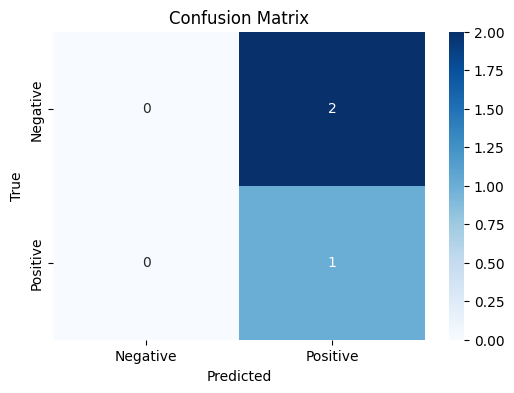

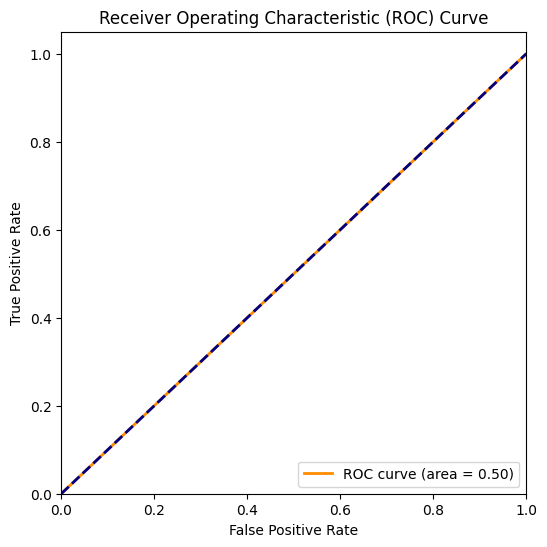

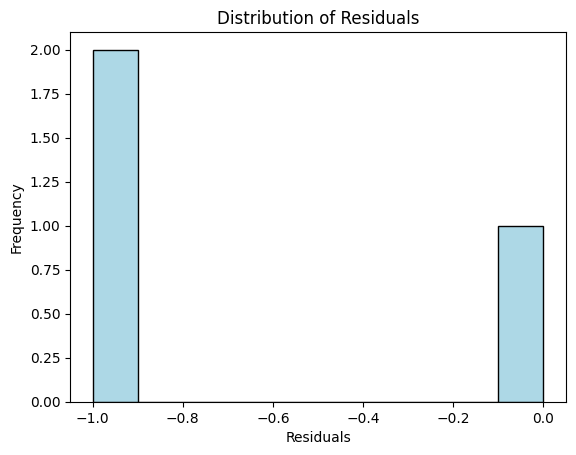

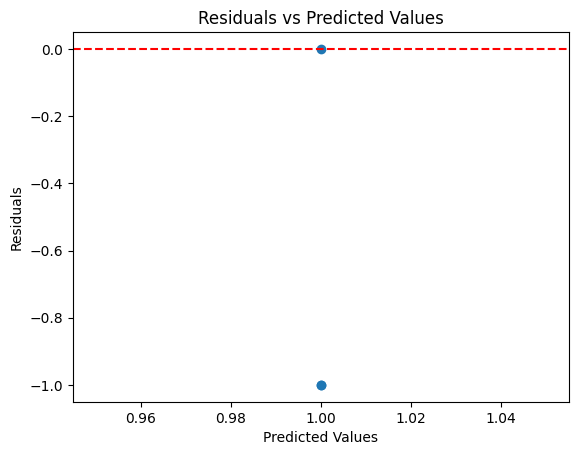

Review: This product is amazing, I will buy it again!
Predicted Sentiment: Negative

Review: The worst experience I had with a product, very poor quality.
Predicted Sentiment: Positive

Review: Just okay, not great, not bad.
Predicted Sentiment: Positive

Review: I'm extremely happy with this purchase!
Predicted Sentiment: Positive

Review: Not worth the money, very disappointed.
Predicted Sentiment: Positive



In [17]:
# Импорт необходимых библиотек
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 1. Создание датасета
data = {
    'text': [
        "I love this product!",
        "Worst purchase I have made.",
        "This is an amazing product!",
        "Very bad quality, do not buy.",
        "Totally worth the money!",
        "Terrible service, I will not return.",
        "Absolutely fantastic experience.",
        "I will never buy this again!",
        "The product is okay, nothing special.",
        "Great value for the price."
    ],
    'sentiment': [1, 0, 1, 0, 1, 0, 1, 0, 1, 1]  # 1 - положительный, 0 - отрицательный
}

df = pd.DataFrame(data)
print(df)

# 2. Предобработка текстовых данных
# Преобразование текста в числовую матрицу с использованием TF-IDF
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(df['text'])
y = df['sentiment']

# 3. Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 4. Построение модели AdaBoost
# Для AdaBoost используем слабый классификатор - решающее дерево (DecisionTreeClassifier)
base_model = DecisionTreeClassifier(max_depth=1)  # слабый классификатор
model = AdaBoostClassifier(estimator=base_model, n_estimators=50, random_state=42)

# Обучение модели
model.fit(X_train, y_train)

# Прогнозирование на тестовых данных
y_pred = model.predict(X_test)

# Оценка качества модели
print("Accuracy: ", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# 5. Поиск оптимальных гиперпараметров с помощью GridSearchCV
param_grid = {'n_estimators': [50, 100, 200], 'learning_rate': [0.01, 0.1, 1]}
grid_search = GridSearchCV(AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1)), param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Лучшая модель и значения гиперпараметров
best_model = grid_search.best_estimator_
print("Лучшие параметры: ", grid_search.best_params_)

# Прогнозирование с лучшей моделью
y_pred_best = best_model.predict(X_test)

# Оценка качества улучшенной модели
print("Accuracy (after tuning): ", accuracy_score(y_test, y_pred_best))
print("Classification Report (after tuning):\n", classification_report(y_test, y_pred_best))

# 6. Оценка качества модели
conf_matrix = confusion_matrix(y_test, y_pred_best)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Negative", "Positive"], yticklabels=["Negative", "Positive"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

# Кривая ROC
fpr, tpr, _ = roc_curve(y_test, best_model.predict_proba(X_test)[:, 1])  # Используем вероятности для построения ROC
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# 7. Диагностика остатков модели
residuals = y_test - y_pred_best

# Гистограмма остатков
plt.hist(residuals, bins=10, edgecolor='black', color='lightblue')
plt.title("Distribution of Residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()

# Остатки по предсказаниям
plt.scatter(y_pred_best, residuals)
plt.axhline(y=0, color='red', linestyle='--')
plt.title("Residuals vs Predicted Values")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.show()

# 8. Тестирование модели на новых данных
new_reviews = [
    "This product is amazing, I will buy it again!",
    "The worst experience I had with a product, very poor quality.",
    "Just okay, not great, not bad.",
    "I'm extremely happy with this purchase!",
    "Not worth the money, very disappointed."
]

# Преобразование новых данных с использованием той же векторизации
new_reviews_transformed = vectorizer.transform(new_reviews)

# Прогнозирование тональности для новых данных
new_predictions = best_model.predict(new_reviews_transformed)

# Вывод предсказанных результатов
for review, sentiment in zip(new_reviews, new_predictions):
    sentiment_label = 'Positive' if sentiment == 1 else 'Negative'
    print(f"Review: {review}\nPredicted Sentiment: {sentiment_label}\n")

#9. Линейный дискриминантный анализ (LDA)


                                    text  sentiment
0                   I love this product!          1
1            Worst purchase I have made.          0
2            This is an amazing product!          1
3          Very bad quality, do not buy.          0
4               Totally worth the money!          1
5   Terrible service, I will not return.          0
6       Absolutely fantastic experience.          1
7           I will never buy this again!          0
8  The product is okay, nothing special.          1
9             Great value for the price.          1
Accuracy:  0.3333333333333333
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.33      1.00      0.50         1

    accuracy                           0.33         3
   macro avg       0.17      0.50      0.25         3
weighted avg       0.11      0.33      0.17         3



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/m

Лучшие параметры:  {'shrinkage': 0.1, 'solver': 'lsqr'}
Accuracy (after tuning):  0.3333333333333333
Classification Report (after tuning):
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.33      1.00      0.50         1

    accuracy                           0.33         3
   macro avg       0.17      0.50      0.25         3
weighted avg       0.11      0.33      0.17         3



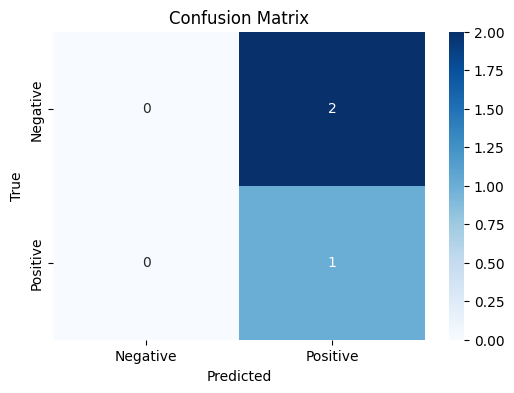

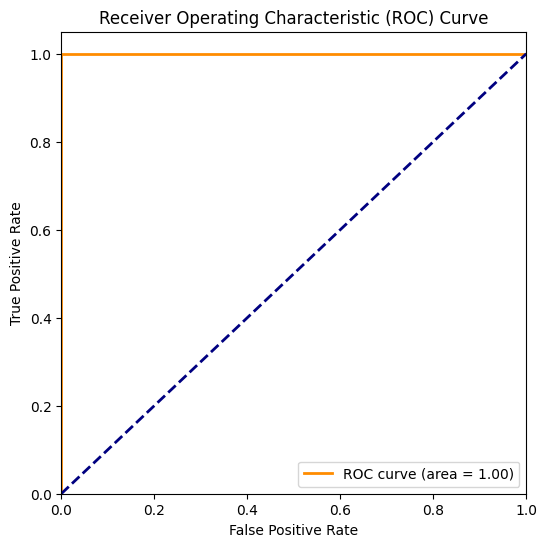

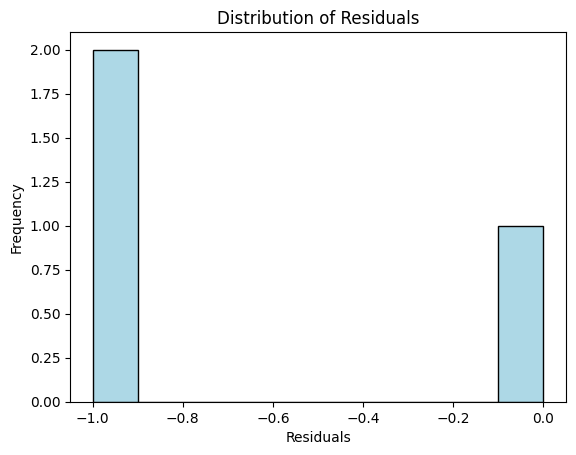

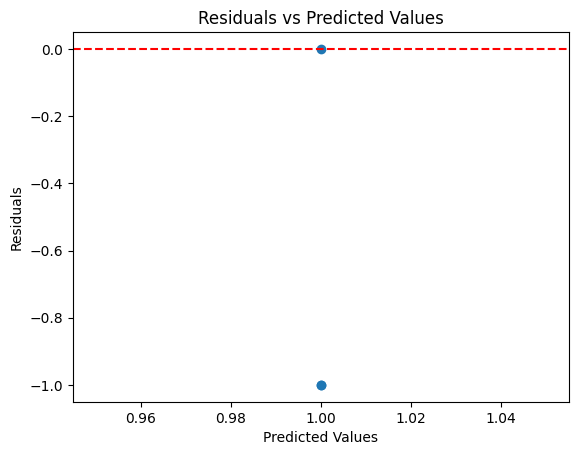

Review: This product is amazing, I will buy it again!
Predicted Sentiment: Positive

Review: The worst experience I had with a product, very poor quality.
Predicted Sentiment: Positive

Review: Just okay, not great, not bad.
Predicted Sentiment: Positive

Review: I'm extremely happy with this purchase!
Predicted Sentiment: Positive

Review: Not worth the money, very disappointed.
Predicted Sentiment: Positive



In [18]:
# Импорт необходимых библиотек
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# 1. Создание датасета
data = {
    'text': [
        "I love this product!",
        "Worst purchase I have made.",
        "This is an amazing product!",
        "Very bad quality, do not buy.",
        "Totally worth the money!",
        "Terrible service, I will not return.",
        "Absolutely fantastic experience.",
        "I will never buy this again!",
        "The product is okay, nothing special.",
        "Great value for the price."
    ],
    'sentiment': [1, 0, 1, 0, 1, 0, 1, 0, 1, 1]  # 1 - положительный, 0 - отрицательный
}

df = pd.DataFrame(data)
print(df)

# 2. Предобработка текстовых данных
# Преобразование текста в числовую матрицу с использованием TF-IDF
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(df['text'])
y = df['sentiment']

# 3. Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 4. Построение модели LDA (Линейный дискриминантный анализ)
lda = LinearDiscriminantAnalysis()

# Обучение модели
lda.fit(X_train.toarray(), y_train)  # LDA требует преобразования разреженной матрицы в плотную

# Прогнозирование на тестовых данных
y_pred = lda.predict(X_test.toarray())

# Оценка качества модели
print("Accuracy: ", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# 5. Поиск оптимальных гиперпараметров с помощью GridSearchCV (для LDA можно настроить только гиперпараметр solver)
param_grid = {'solver': ['svd', 'lsqr', 'eigen'], 'shrinkage': [None, 'auto', 0.1, 0.5, 1.0]}
grid_search = GridSearchCV(LinearDiscriminantAnalysis(), param_grid, cv=5)
grid_search.fit(X_train.toarray(), y_train)

# Лучшая модель и значения гиперпараметров
best_model = grid_search.best_estimator_
print("Лучшие параметры: ", grid_search.best_params_)

# Прогнозирование с лучшей моделью
y_pred_best = best_model.predict(X_test.toarray())

# Оценка качества улучшенной модели
print("Accuracy (after tuning): ", accuracy_score(y_test, y_pred_best))
print("Classification Report (after tuning):\n", classification_report(y_test, y_pred_best))

# 6. Оценка качества модели
conf_matrix = confusion_matrix(y_test, y_pred_best)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Negative", "Positive"], yticklabels=["Negative", "Positive"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

# Кривая ROC
fpr, tpr, _ = roc_curve(y_test, best_model.decision_function(X_test.toarray()))
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# 7. Диагностика остатков модели
residuals = y_test - y_pred_best

# Гистограмма остатков
plt.hist(residuals, bins=10, edgecolor='black', color='lightblue')
plt.title("Distribution of Residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()

# Остатки по предсказаниям
plt.scatter(y_pred_best, residuals)
plt.axhline(y=0, color='red', linestyle='--')
plt.title("Residuals vs Predicted Values")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.show()

# 8. Тестирование модели на новых данных
new_reviews = [
    "This product is amazing, I will buy it again!",
    "The worst experience I had with a product, very poor quality.",
    "Just okay, not great, not bad.",
    "I'm extremely happy with this purchase!",
    "Not worth the money, very disappointed."
]

# Преобразование новых данных с использованием той же векторизации
new_reviews_transformed = vectorizer.transform(new_reviews)

# Прогнозирование тональности для новых данных
new_predictions = best_model.predict(new_reviews_transformed.toarray())

# Вывод предсказанных результатов
for review, sentiment in zip(new_reviews, new_predictions):
    sentiment_label = 'Positive' if sentiment == 1 else 'Negative'
    print(f"Review: {review}\nPredicted Sentiment: {sentiment_label}\n")

#10. Метод главных компонент (PCA)

                                    text  sentiment
0                   I love this product!          1
1            Worst purchase I have made.          0
2            This is an amazing product!          1
3          Very bad quality, do not buy.          0
4               Totally worth the money!          1
5   Terrible service, I will not return.          0
6       Absolutely fantastic experience.          1
7           I will never buy this again!          0
8  The product is okay, nothing special.          1
9             Great value for the price.          1
Accuracy:  0.3333333333333333
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.33      1.00      0.50         1

    accuracy                           0.33         3
   macro avg       0.17      0.50      0.25         3
weighted avg       0.11      0.33      0.17         3

Лучшие параметры:  {'C': 1, 'kernel': 'rbf'}
Ac

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/m

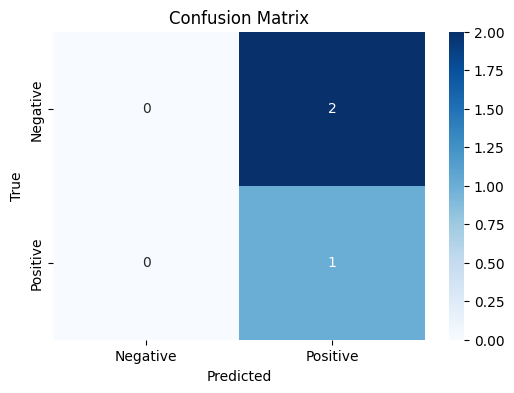

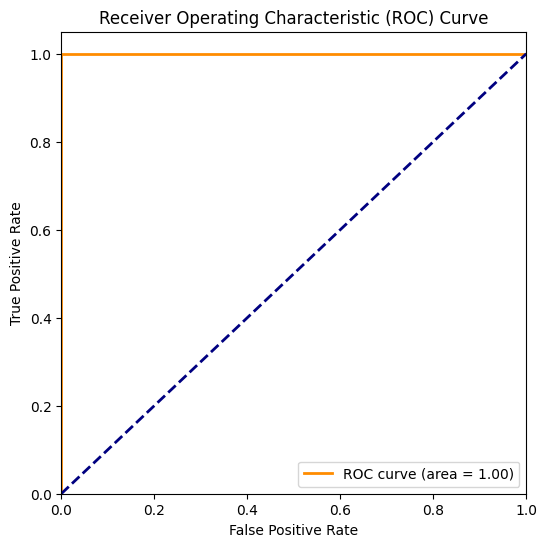

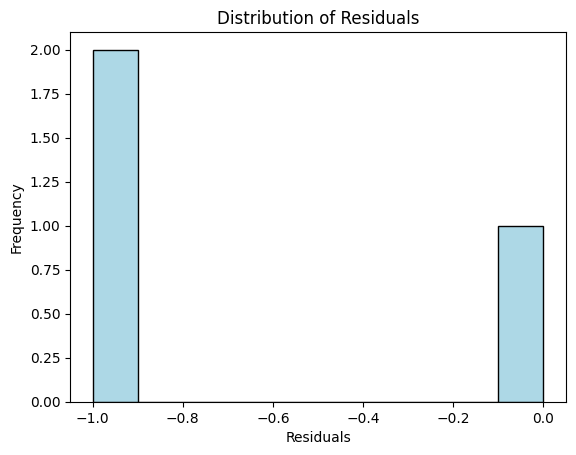

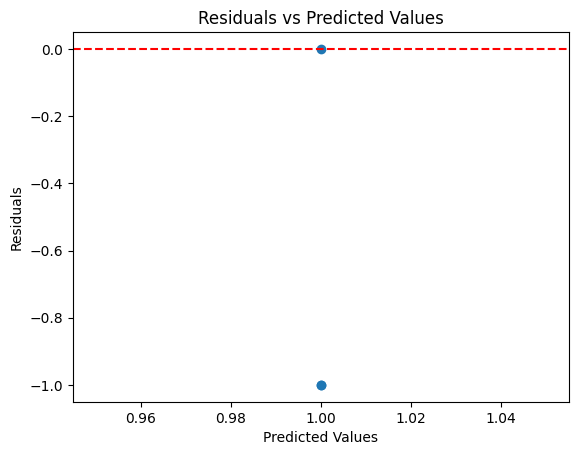

Review: This product is amazing, I will buy it again!
Predicted Sentiment: Positive

Review: The worst experience I had with a product, very poor quality.
Predicted Sentiment: Positive

Review: Just okay, not great, not bad.
Predicted Sentiment: Positive

Review: I'm extremely happy with this purchase!
Predicted Sentiment: Positive

Review: Not worth the money, very disappointed.
Predicted Sentiment: Positive



In [19]:
# Импорт необходимых библиотек
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.decomposition import PCA  # Импорт PCA

# 1. Создание датасета
data = {
    'text': [
        "I love this product!",
        "Worst purchase I have made.",
        "This is an amazing product!",
        "Very bad quality, do not buy.",
        "Totally worth the money!",
        "Terrible service, I will not return.",
        "Absolutely fantastic experience.",
        "I will never buy this again!",
        "The product is okay, nothing special.",
        "Great value for the price."
    ],
    'sentiment': [1, 0, 1, 0, 1, 0, 1, 0, 1, 1]  # 1 - положительный, 0 - отрицательный
}

df = pd.DataFrame(data)
print(df)

# 2. Предобработка текстовых данных
# Преобразование текста в числовую матрицу с использованием TF-IDF
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(df['text'])
y = df['sentiment']

# 3. Применение PCA для уменьшения размерности
# Применяем PCA, чтобы уменьшить размерность данных после TF-IDF
pca = PCA(n_components=2)  # Уменьшаем до 2 компонент для наглядности
X_pca = pca.fit_transform(X.toarray())  # Преобразуем в массив для PCA

# 4. Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.3, random_state=42)

# 5. Построение модели SVM
model = SVC(kernel='linear')

# Обучение модели
model.fit(X_train, y_train)

# Прогнозирование на тестовых данных
y_pred = model.predict(X_test)

# Оценка качества модели
print("Accuracy: ", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# 6. Поиск оптимальных гиперпараметров с помощью GridSearchCV
param_grid = {'C': [0.1, 1, 10, 100], 'kernel': ['linear', 'rbf']}
grid_search = GridSearchCV(SVC(), param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Лучшая модель и значения гиперпараметров
best_model = grid_search.best_estimator_
print("Лучшие параметры: ", grid_search.best_params_)

# Прогнозирование с лучшей моделью
y_pred_best = best_model.predict(X_test)

# Оценка качества улучшенной модели
print("Accuracy (after tuning): ", accuracy_score(y_test, y_pred_best))
print("Classification Report (after tuning):\n", classification_report(y_test, y_pred_best))

# 7. Оценка качества модели
conf_matrix = confusion_matrix(y_test, y_pred_best)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Negative", "Positive"], yticklabels=["Negative", "Positive"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

# Кривая ROC
fpr, tpr, _ = roc_curve(y_test, best_model.decision_function(X_test))
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# 8. Диагностика остатков модели
residuals = y_test - y_pred_best

# Гистограмма остатков
plt.hist(residuals, bins=10, edgecolor='black', color='lightblue')
plt.title("Distribution of Residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()

# Остатки по предсказаниям
plt.scatter(y_pred_best, residuals)
plt.axhline(y=0, color='red', linestyle='--')
plt.title("Residuals vs Predicted Values")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.show()

# 9. Тестирование модели на новых данных
new_reviews = [
    "This product is amazing, I will buy it again!",
    "The worst experience I had with a product, very poor quality.",
    "Just okay, not great, not bad.",
    "I'm extremely happy with this purchase!",
    "Not worth the money, very disappointed."
]

# Преобразование новых данных с использованием той же векторизации
new_reviews_transformed = vectorizer.transform(new_reviews)

# Применение PCA к новым данным
new_reviews_pca = pca.transform(new_reviews_transformed.toarray())

# Прогнозирование тональности для новых данных
new_predictions = best_model.predict(new_reviews_pca)

# Вывод предсказанных результатов
for review, sentiment in zip(new_reviews, new_predictions):
    sentiment_label = 'Positive' if sentiment == 1 else 'Negative'
    print(f"Review: {review}\nPredicted Sentiment: {sentiment_label}\n")